#ASSIGNMENT 3

#Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data reading

In [21]:
df_train_loan = pd.read_csv('/content/train_loan.csv')
df_train_loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Data Description
###Data set key information
####Loan_ID: Unique Loan ID.
####Gender: Male/ Female
####Married: Applicant married (Y/N)
####Dependents: Number of dependents
####Education: Applicant Education (Graduate/ Under Graduate)
####Self_Employed: Self-employed (Y/N)
####ApplicantIncome: Applicant income
####CoapplicantIncome:Coapplicant income
####LoanAmount: Loan amount in thousands
####Loan_Amount_Term: Term of a loan in months
####Credit_History: Credit history meets guidelines
####Property_Area: Urban/ Semi-Urban/ Rural
####Loan_Status : Loan approved (Y/N)

#Data exploration

In [22]:
#shape of dataset
df_train_loan.shape

(614, 13)

In [23]:
#get informations about the dataset
df_train_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


###As we can see in the output.

####There are 614 entries
####There are total 13 features (0 to 12)
####There are three types of datatype dtypes: float64(4), int64(1), object(8)

In [24]:
# the important information from the dataset
df_train_loan.describe()
#It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Data Cleaning

In [25]:
# idetify and remove duplicate rows
df_train_loan.duplicated().sum()

np.int64(0)

####as we can see there is no duplicate rows in the data

In [26]:
# identify and remove unnecessary columns
#remove not a relevant feature in loan sanction such as loan ID, Gender, Marital status and education

df_train_loan.drop(columns=['Loan_ID','Married','Education','Gender'], inplace=True)
df_train_loan.head(5)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# check for missing values
df_train_loan.isnull().sum()

,0
Dependents,15
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Property_Area,0
Loan_Status,0


In [28]:
df_train_loan.dropna(inplace=True)

In [29]:
# after missing value handling
df_train_loan.isnull().sum()

,0
Dependents,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0
Loan_Status,0


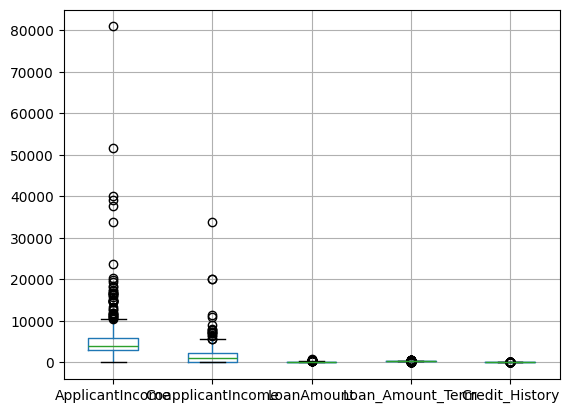

In [30]:
# identify outliers
df_train_loan.boxplot()
plt.show()

####As we can see there are outliers in applicant income column and coapplicant income column, need to remove the outliers

In [31]:
# outlier handling using IQR in applicant income column
Q1 = df_train_loan['ApplicantIncome'].quantile(0.25)
Q3 = df_train_loan['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train_loan = df_train_loan[(df_train_loan['ApplicantIncome'] >= lower_bound) & (df_train_loan['ApplicantIncome'] <= upper_bound)]



In [32]:
# outlier handling using IQR in applicant CoapplicantIncome column
Q1 = df_train_loan['CoapplicantIncome'].quantile(0.25)
Q3 = df_train_loan['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

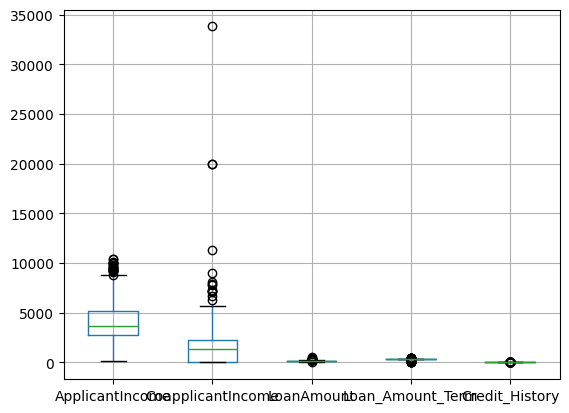

In [33]:
#check for outliers in applicant income column and coapplicant income column
df_train_loan.boxplot()
plt.show()

####We can see that major outliers are removed

In [34]:
#Print dataset after outlier handling
df_train_loan.head(5)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [35]:
#We have to encode the categorical columns
#Apply ordinal encoding in column Self_Employed
df_train_loan['Self_Employed'] = df_train_loan['Self_Employed'].map({'Yes': 1, 'No': 0})

In [36]:
#Apply Ordinal encoding in column Property_Area
df_train_loan['Property_Area'] = df_train_loan['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

In [37]:
df_train_loan.head(5)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,2,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [38]:
#scaling
#The MinMaxScaler  is a good choice for this dataframe after handling outliers, as it scales the data to a fixed range (0 to 1). This can be beneficial for algorithms that are sensitive to the magnitude of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_loan[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(df_train_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])
df_train_loan.head(5)

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,0.431814,0.044567,0.244856,0.72973,1.0,0,N
2,0,1,0.277615,0.000000,0.117284,0.72973,1.0,2,Y
3,0,0,0.236996,0.069687,0.228395,0.72973,1.0,2,Y
4,0,0,0.569842,0.000000,0.271605,0.72973,1.0,2,Y
5,2,1,0.513053,0.124006,0.530864,0.72973,1.0,2,Y


####Thus the data is preprocessed and ready for modelling
